In [3]:
import cv2 as cv
import PIL as p
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

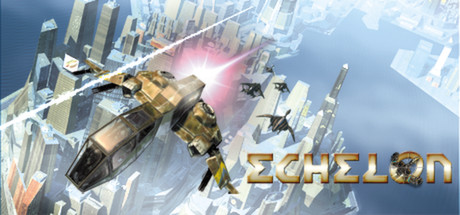

In [4]:
imp = p.Image.open('header.jpg',mode='r')
imp

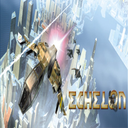

In [7]:
imp = imp.resize((128,128), p.Image.Resampling.LANCZOS)
imp

In [8]:
imp.save('pilheader.jpg')

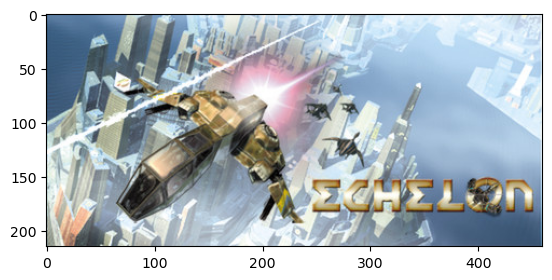

In [4]:
img = cv.imread('header.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [18]:
cv.imwrite('cvimg.jpg',cv.resize(img,(200,200)))

True

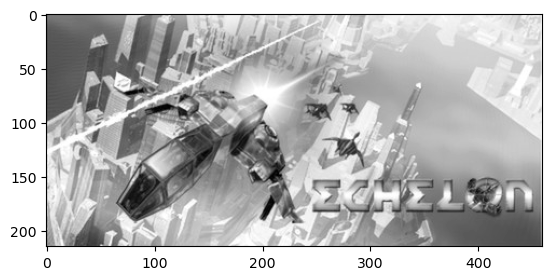

In [20]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2GRAY),cmap='gray')

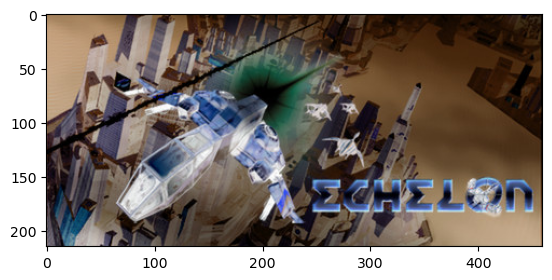

In [21]:
plt.imshow(cv.cvtColor(cv.bitwise_not(img), cv.COLOR_BGR2RGB))

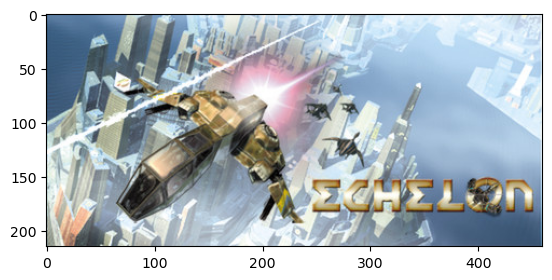

In [26]:
plt.imshow(cv.cvtColor(img.astype(np.uint8), cv.COLOR_BGR2RGB))
img = img.astype(np.uint8)

In [31]:
def printcv(img,param = cv.COLOR_BGR2RGB):
    plt.imshow(cv.cvtColor(img,param))


In [5]:
imgray = cv.cvtColor(img.astype(np.uint8), cv.COLOR_BGR2GRAY)

In [43]:
imgray.flatten()

array([ 92, 117, 123, ...,  82,  90, 127], dtype=uint8)

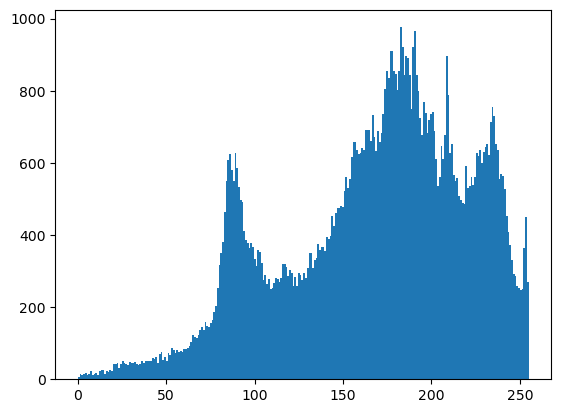

In [44]:
plt.hist(imgray.flatten(),bins=256)
plt.show()

In [59]:
ret,th1 = cv.threshold(imgray,125,235,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(imgray,255,cv.ADAPTIVE_THRESH_MEAN_C,\
 cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(imgray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv.THRESH_BINARY,11,2)



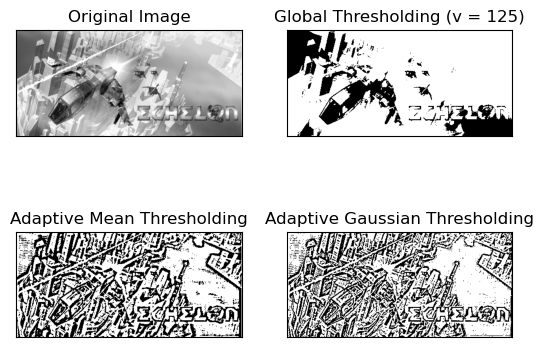

In [61]:
titles = ['Original Image', 'Global Thresholding (v = 125)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [imgray, th1, th2, th3]



for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

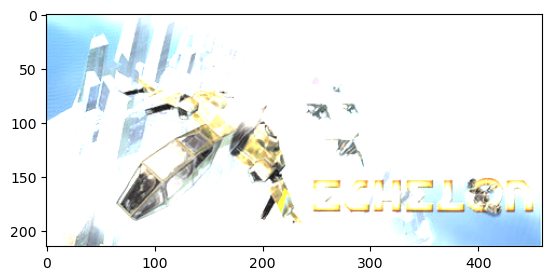

In [12]:
# define the alpha and beta
alpha = 2 # Contrast control
beta = 20 # Brightness control

# call convertScaleAbs function
adjusted = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# display the output image
printcv(adjusted)

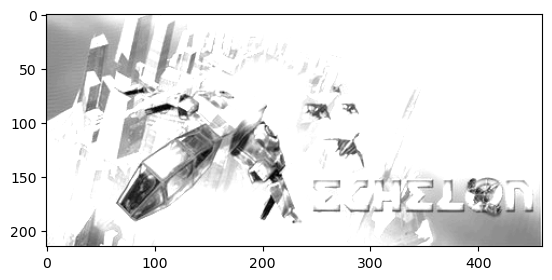

In [58]:
brighten = cv.convertScaleAbs(imgray, alpha=0.5, beta=180)
plt.imshow(brighten,'gray')

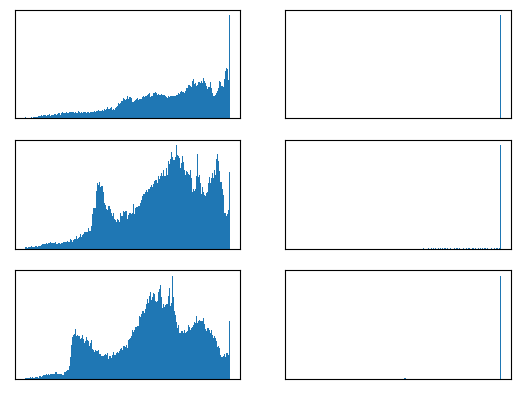

In [59]:
images = [img[:,:,0],adjusted[:,:,0],img[:,:,1],adjusted[:,:,1],img[:,:,2],adjusted[:,:,2]]
for i in range(6):
    plt.subplot(3,2,i+1),plt.hist(images[i].flatten(),bins=256)
    plt.xticks([]),plt.yticks([])

In [60]:
img.shape

(215, 460, 3)

In [100]:
def histogram_equalization(img):
    p2, p98 = np.percentile(img, (2, 98))
    img = np.where(img<=p2,p2,img)
    img = np.where(img>=p98,p98,img)
    k = 255 // (p98 - p2)
    img = (img - p2) * k
    return  img

In [85]:
iimg = cv.imread('Unequalized_Hawkes_Bay_NZ.jpg',cv.IMREAD_GRAYSCALE)
iimg.dtype

dtype('uint8')

In [97]:
iimg.max()

223

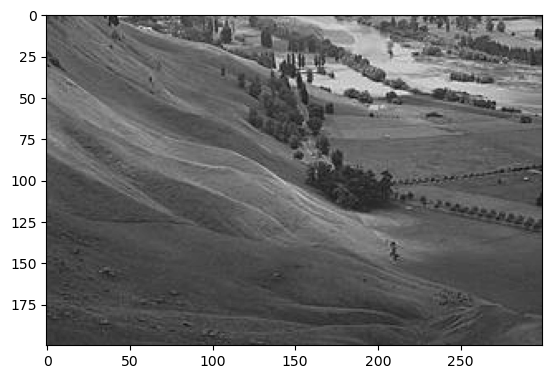

In [105]:
#iimg = cv.cvtColor(iimg, cv.COLOR_RGB2GRAY)
plt.imshow(iimg,'gray',filternorm=False)

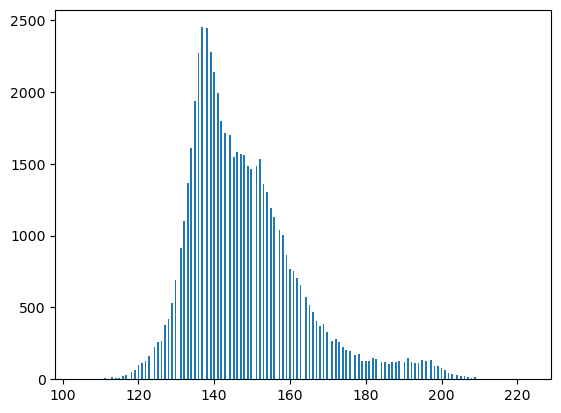

In [102]:
plt.hist(iimg.flatten(),bins=256)
plt.show()

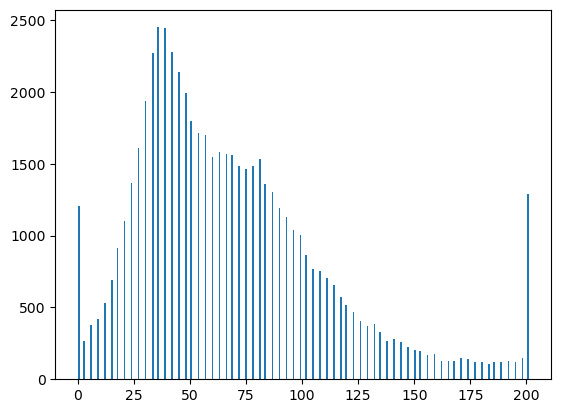

In [103]:
plt.hist(histogram_equalization(iimg).flatten(),bins=256)
plt.show()

In [104]:
cv.imwrite('eqed.jpg',histogram_equalization(iimg))

True

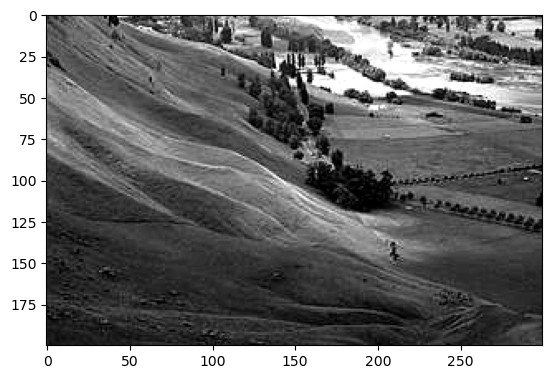

: 

In [106]:
plt.imshow(histogram_equalization(iimg),'gray',filternorm=False)